# **Generic Template For Creating Tranfer Learning**

# **Tomato Leaf Disease Prediction**

#### **Implemented VGG16 and VGG19**

**Data set:-** https://www.kaggle.com/code/souvikdatta123/tomato-leaf-disease-prediction/data


### **VGG Architecture**
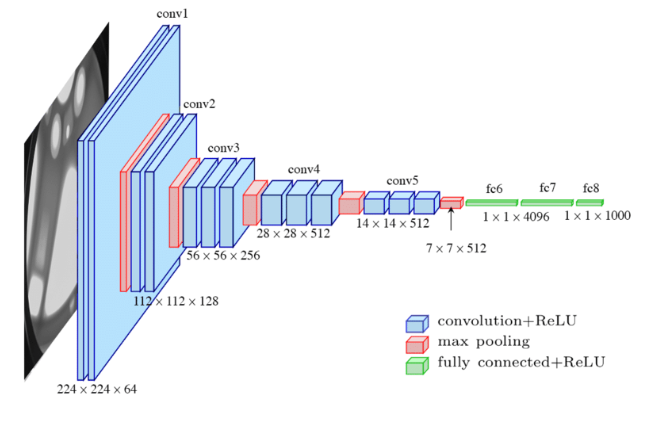

In [1]:
!pip install tensorflow-gpu

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 588.3 MB 20 kB/s 
     |████████████████████████████████| 6.0 MB 63.8 MB/s 
     |████████████████████████████████| 1.7 MB 59.1 MB/s 
     |████████████████████████████████| 439 kB 59.3 MB/s 
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.9.0
    Uninstalling tensorflow-estimator-2.9.0:
      Successfully uninstalled tensorflow-estimator-2.9.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.9.1
    Uninstalling tensorboard-2.9.1:
      Successfully uninstalled tensorboard-2.9.1
  Attempting uninstall: keras
    Found existing installation: keras 2.9.0
    Uninstalling keras-2.9.0:
      Successfully uninstalled keras-2.9.0
  Attempting uninstall: flatbuffers
    Found existing installation: flatbuffers 1.12
    Uninstalling flatbuffers-1.12:
      Successfully u

In [4]:
!mkdir ~p ~/.kaggle
!cp kaggle.json ~/.kaggle/

mkdir: cannot create directory ‘~p’: File exists
mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [5]:
!kaggle datasets download -d noulam/tomato

100% 742M/743M [00:23<00:00, 38.7MB/s]
100% 743M/743M [00:23<00:00, 33.2MB/s]


In [6]:
#Data we have received is Zip format so, we have unzip the Dataset

import zipfile
import io
zf = zipfile.ZipFile("/content/tomato.zip", "r")
zf.extractall("/content")
zf.close()

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [8]:
# Importing the Libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import Model

from tensorflow.keras.layers import Input,Lambda,Dense,Flatten 

from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img

from keras.applications.vgg16 import VGG16
#from keras.applications.vgg16 import VGG19

from glob import glob

In [9]:
# Re-Size the Image
Image_Size = [224,224]

train_path = "/content/New Plant Diseases Dataset(Augmented)/train"
valid_path = "/content/New Plant Diseases Dataset(Augmented)/valid"

**Note:-** Include_top: This parameter says that "Remove the First and Last Layer , Because we know that my 1st Layer will have 224,224 from the weights itself. Sometimes people wants to put their own Input Image size.  Apart from the Last Layer which will definately be Thousand Category but my proplem statement in this case has Four Categories." 

In [10]:
# Import the VGG16 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

vgg16 = VGG16(input_shape= Image_Size + [3], weights= "imagenet",include_top= False)

58889256/58889256 [==============================] - 2s 0us/step


**Note**:- We are using the  Existing weights of ImageNet , so we need not Retrain the weights. Only the training should happen in the Last Layer, Not in the Middle Layer.

In [11]:
# Don't train existing weights

for layer in vgg16.layers:
  layer.trainable = False

In [12]:
folders = glob("/content/New Plant Diseases Dataset(Augmented)/train/*")

In [13]:
folders

['/content/New Plant Diseases Dataset(Augmented)/train/Tomato___Tomato_Yellow_Leaf_Curl_Virus',
 '/content/New Plant Diseases Dataset(Augmented)/train/Tomato___Early_blight',
 '/content/New Plant Diseases Dataset(Augmented)/train/Tomato___Target_Spot',
 '/content/New Plant Diseases Dataset(Augmented)/train/Tomato___healthy',
 '/content/New Plant Diseases Dataset(Augmented)/train/Tomato___Septoria_leaf_spot',
 '/content/New Plant Diseases Dataset(Augmented)/train/Tomato___Leaf_Mold',
 '/content/New Plant Diseases Dataset(Augmented)/train/Tomato___Bacterial_spot',
 '/content/New Plant Diseases Dataset(Augmented)/train/Tomato___Tomato_mosaic_virus',
 '/content/New Plant Diseases Dataset(Augmented)/train/Tomato___Spider_mites Two-spotted_spider_mite',
 '/content/New Plant Diseases Dataset(Augmented)/train/Tomato___Late_blight']

In [15]:
# Our Layers we can add more if we want

x = Flatten()(vgg16.output)

In [16]:
len(folders)

10

In [18]:
prediction = Dense(len(folders),activation = "softmax")(x)

# create a Model Object
model = Model(inputs = vgg16.input,outputs = prediction)

In [19]:
#View the structure of the Model

model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [21]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [22]:
# Data Preprocesing

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

In [24]:
#Preprocess the Test size
test_datagen = ImageDataGenerator(rescale = 1./255)

In [25]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory("/content/New Plant Diseases Dataset(Augmented)/train",
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 18345 images belonging to 10 classes.


In [26]:
#Reading Test DataSet
test_set = test_datagen.flow_from_directory("/content/New Plant Diseases Dataset(Augmented)/valid",
                                            target_size = (224,224),
                                            batch_size = 32,
                                            class_mode = "categorical")

Found 4585 images belonging to 10 classes.


In [28]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=20,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

<ipython-input-28-2d02736eff38>:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  r = model.fit_generator(


Epoch 1/20
574/574 [==============================] - 262s 431ms/step - loss: 0.7431 - accuracy: 0.7557 - val_loss: 0.4417 - val_accuracy: 0.8478
Epoch 2/20
574/574 [==============================] - 237s 413ms/step - loss: 0.4331 - accuracy: 0.8551 - val_loss: 0.5322 - val_accuracy: 0.8164
Epoch 3/20
574/574 [==============================] - 238s 414ms/step - loss: 0.3263 - accuracy: 0.8929 - val_loss: 0.6126 - val_accuracy: 0.8273
Epoch 4/20
574/574 [==============================] - 239s 416ms/step - loss: 0.3132 - accuracy: 0.8978 - val_loss: 0.4346 - val_accuracy: 0.8696
Epoch 5/20
574/574 [==============================] - 237s 414ms/step - loss: 0.2875 - accuracy: 0.9061 - val_loss: 0.5147 - val_accuracy: 0.8467
Epoch 6/20
574/574 [==============================] - 239s 415ms/step - loss: 0.2376 - accuracy: 0.9192 - val_loss: 0.4256 - val_accuracy: 0.8676
Epoch 7/20
574/574 [==============================] - 236s 412ms/step - loss: 0.2264 - accuracy: 0.9245 - val_loss: 0.3917 -

In [35]:
print(r.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


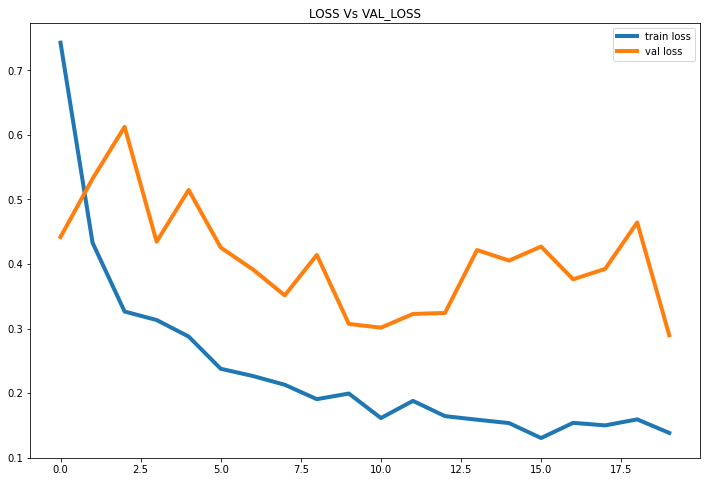

<Figure size 432x288 with 0 Axes>

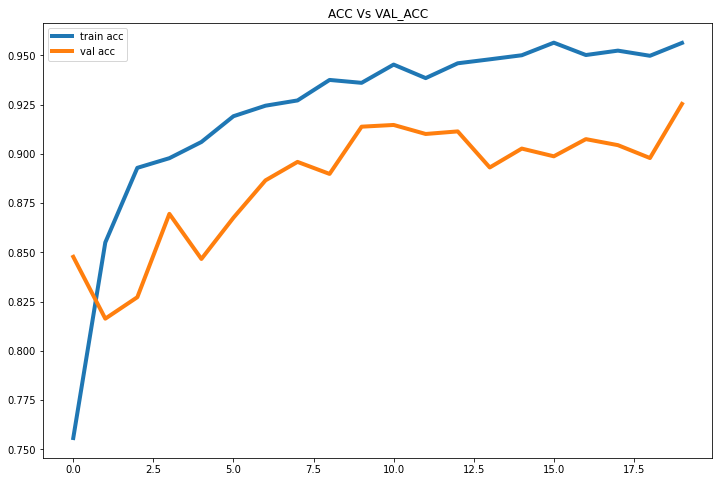

<Figure size 432x288 with 0 Axes>

In [43]:
# plot the loss
plt.figure(figsize = (12,8))
plt.plot(r.history['loss'], label='train loss',linewidth = 4)
plt.plot(r.history['val_loss'], label='val loss',linewidth = 4)
plt.title("LOSS Vs VAL_LOSS")
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.figure(figsize = (12,8))
plt.plot(r.history['accuracy'], label='train acc',linewidth = 4)
plt.plot(r.history['val_accuracy'], label='val acc',linewidth = 4)
plt.title("ACC Vs VAL_ACC")
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

**References:-**

https://www.kaggle.com/code/kinnerakiran/tomato-leaf-detection-using-transfer-learning (Entire Implementation)

---

https://www.kaggle.com/code/anuragupadhyay6212/cotton-disease-prediction-cnn-for-beginners/notebook

Text(0.5, 1.0, 'Bacterial Spot')

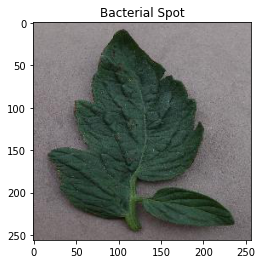

In [44]:
import matplotlib.pyplot as plt
plt.imshow(plt.imread("/content/New Plant Diseases Dataset(Augmented)/train/Tomato___Bacterial_spot/00416648-be6e-4bd4-bc8d-82f43f8a7240___GCREC_Bact.Sp 3110.JPG"))
plt.title("Bacterial Spot")